## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, datetime, timedelta

from time import time

## Setup objects about ETF portfolio

### Basic Objects

In [2]:
# Symbollist of the sector ETFs
sectorlist = ['XLB', # Building Materials Sector ETF
              'XLE', # Energy Sector ETF
              'XLF', # Financial Sector ETF
              'XLI', # Industrial Sector ETF
              'XLK', # Technology Sector ETF
              'XLP', # Consumer Staples Sector ETF
              'XLU', # Utilities Sector ETF
              'XLV', # Health Care ETF
              'XLY', # Consumer Discretionary ETF
              'VNQ', # Real Estate Index Fund ETF
              'TLT', # 20-Year Treasury Bond ETF
              'GLD'  # Gold ETF
             ]

# S&P 500 ETF as benchmark
benchmark = 'SPY'         

# startdate and enddate of research
startdate = '2011-01-03'
enddate = '2019-06-30'

# Risk-free interest rate set as mean treasury yield at 2%
rf = 0.02



## Get Adjusted data from Yahoo Finance

In [3]:
# pip install yahoo_historical before importing
from yahoo_historical import Fetcher

# inspecting raw data
data_spy = Fetcher('SPY', [2011, 1, 1], [2019, 6, 30])
df_spy = data_spy.getHistorical()
df_spy.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,126.709999,127.599998,125.699997,127.050003,107.077354,138725200
1,2011-01-04,127.330002,127.370003,126.190002,126.980003,107.018349,137409700
2,2011-01-05,126.580002,127.720001,126.459999,127.639999,107.574608,133975300
3,2011-01-06,127.690002,127.830002,127.010002,127.389999,107.363914,122519000
4,2011-01-07,127.559998,127.769997,126.150002,127.139999,107.153206,156034600
5,2011-01-10,126.580002,127.160004,126.199997,126.980003,107.018349,122401700
6,2011-01-11,127.440002,127.739998,126.949997,127.430000,107.397629,110287000
7,2011-01-12,128.210007,128.720001,127.459999,128.580002,108.366859,107929200
8,2011-01-13,128.630005,128.690002,128.050003,128.369995,108.189850,129048400
9,2011-01-14,128.190002,129.330002,128.100006,129.300003,108.973648,117677900


In [4]:
# Get dataframe of dividend-dajusted price

def get_adjusted_data(symbol, startdate, enddate=date.today().strftime('%Y-%m-%d')):
    """
    Get stock data from Yahoo Finance for US market and adjust by ex-dividend factors. 
    """
    dt_startdate = datetime.strptime(startdate, '%Y-%m-%d')
    dt_enddate = datetime.strptime(enddate, '%Y-%m-%d')
    start_date = [dt_startdate.year, dt_startdate.month, dt_startdate.day]
    end_date = [dt_enddate.year, dt_enddate.month, dt_enddate.day]
    data = Fetcher(symbol, start_date, end_date)
    df = data.getHistorical()
    df = df[df['Volume'] > 0]
    df.set_index('Date', inplace=True)
    
    # Adjust by cumulative ex-dividend factor
    factor = df['Adj Close'] / df['Close']
    df['Open'] = df['Open'] * factor
    df['High'] = df['High'] * factor
    df['Low'] = df['Low'] * factor
    df['Volume'] = df['Volume'] / factor
    df['Close'] = df['Adj Close']
    df.drop(['Adj Close'], axis=1, inplace=True)
    
    return df

df_spy = get_adjusted_data('SPY', startdate, enddate)
df_spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,106.790800,107.540888,105.939573,107.077354,1.646010e+08
2011-01-04,107.313327,107.347040,106.352539,107.018349,1.630401e+08
2011-01-05,106.681246,107.642033,106.580108,107.574608,1.589651e+08
2011-01-06,107.616756,107.734747,107.043654,107.363914,1.453719e+08
2011-01-07,107.507180,107.684166,106.318840,107.153206,1.851390e+08
2011-01-10,106.681229,107.170053,106.360962,107.018349,1.452327e+08
2011-01-11,107.406059,107.658894,106.993084,107.397629,1.308583e+08
2011-01-12,108.055028,108.484850,107.422924,108.366859,1.280607e+08
2011-01-13,108.408986,108.459551,107.920162,108.189850,1.531192e+08



### Data Dictionary

In [5]:
# Start time count
start_time = time()

etf_dict = dict()

# Set the data columns of each Yahoo Finance Dataframe
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
# Collect the index ETF data into the data dict
df_benchmark = get_adjusted_data(benchmark, startdate, enddate)
df_benchmark = df_benchmark.loc[startdate:enddate]
df_benchmark.columns = columns
etf_dict[benchmark] = df_benchmark

# Collect each sector ETF data into the data dict
for symbol in sectorlist:
    df = get_adjusted_data(symbol, startdate, enddate)
    df.fillna(method='ffill', inplace=True)           
    df = df.loc[startdate:enddate]
    df.columns = columns
    etf_dict[symbol] = df
    
# Check time elapsed
print('\nTime elapsed: ', time() - start_time)


Time elapsed:  12.030310153961182


In [6]:
etf_dict['TLT'].head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,73.558859,74.434937,73.361545,73.724609,1.748401e+07
2011-01-04,73.724596,74.008724,73.329967,73.811409,1.326170e+07
2011-01-05,72.998427,73.156282,71.972396,72.185493,2.225889e+07
2011-01-06,72.248673,72.706445,71.948758,72.501236,1.180539e+07
2011-01-07,72.225026,73.108992,71.846180,72.888000,1.608422e+07
2011-01-10,73.069489,73.393081,72.753784,73.282585,1.051013e+07
2011-01-11,72.998470,73.085289,72.367067,72.872192,1.203079e+07
2011-01-12,72.406533,72.745914,72.177648,72.303932,1.206564e+07
2011-01-13,72.311777,73.219418,72.177598,72.951073,1.837474e+07


### Normed price: Setting asset price at startdate to be 1.000 and normalize

In [7]:
# Normed benchmark index
df_normed_benchmark = etf_dict[benchmark].loc[:, ['Close']] / etf_dict[benchmark].loc[:, 'Close'][0]
df_normed_benchmark.columns = [benchmark]

# Dataframe of normed price of each ETF
df_normed_sectors = pd.DataFrame(columns=sectorlist)
for symbol in sectorlist:
    df_normed_sectors[symbol] = etf_dict[symbol].loc[:, 'Close'] / etf_dict[symbol].loc[:, 'Close'][0]

# Last 10 rows of sector ETF normed price
df_normed_sectors.tail(10)
    

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,VNQ,TLT,GLD
Date,,,,,,,,,,,,
2019-06-17,1.756240,1.090512,3.112060,2.536640,3.436231,2.506747,2.598077,3.307203,3.531431,2.246702,1.782745,0.916522
2019-06-18,1.770023,1.105579,3.153570,2.585922,3.498494,2.493133,2.587366,3.335347,3.558243,2.244471,1.791680,0.921159
2019-06-19,1.760222,1.104338,3.147805,2.583897,3.511127,2.503344,2.607074,3.365294,3.564797,2.256614,1.794252,0.926739
2019-06-20,1.782581,1.128800,3.161641,2.627102,3.562563,2.525467,2.623784,3.380087,3.589523,2.268014,1.798990,0.950072
2019-06-21,1.776911,1.136957,3.154572,2.613101,3.545719,2.517279,2.633932,3.396321,3.572902,2.236046,1.779225,0.956377
2019-06-24,1.783690,1.126761,3.141824,2.608016,3.552511,2.523709,2.634796,3.378565,3.553770,2.228363,1.792492,0.970580
2019-06-25,1.784614,1.117817,3.131394,2.588353,3.487311,2.522423,2.618817,3.364796,3.519692,2.195403,1.798043,0.972464
2019-06-26,1.781533,1.134990,3.125599,2.594795,3.524891,2.486413,2.561811,3.322401,3.531051,2.151540,1.786536,0.963551
2019-06-27,1.787387,1.126582,3.153413,2.597168,3.533947,2.491129,2.565266,3.345592,3.553173,2.179237,1.799125,0.962609


## Portfolio Weights & Performance KPI

### Portfolio Weights

In [8]:
def pf_weight(weight):
    """Compute the normed price and percentage return of the porfolio with given weight."""
    assert weight.min() >= 0, 'Input weight vector has negative weight!'
    assert len(weight) == len(sectorlist), 'Length of weight vector does NOT match!'
    
    # Dataframe of each sector AND the portfolio's normed price 
    df_normed_pf = df_normed_sectors.copy()
    df_normed_pf['Portfolio'] = df_normed_pf.mul(weight, axis=1).sum(axis=1)
    df_normed_pf['Benchmark'] = df_normed_benchmark

    # Percentage return for each symbol and the weighted portfolio
    df_pct_pf = df_normed_pf.pct_change()

    return df_normed_pf, df_pct_pf

In [9]:
# Equal Weight Portfolio
eqweight = np.repeat(1/len(sectorlist), len(sectorlist))
df_normed_pf, df_pct_pf = pf_weight(eqweight)

df_normed_pf.tail(10)

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,VNQ,TLT,GLD,Portfolio,Benchmark
Date,,,,,,,,,,,,,,
2019-06-17,1.756240,1.090512,3.112060,2.536640,3.436231,2.506747,2.598077,3.307203,3.531431,2.246702,1.782745,0.916522,2.401759,2.689358
2019-06-18,1.770023,1.105579,3.153570,2.585922,3.498494,2.493133,2.587366,3.335347,3.558243,2.244471,1.791680,0.921159,2.420416,2.717519
2019-06-19,1.760222,1.104338,3.147805,2.583897,3.511127,2.503344,2.607074,3.365294,3.564797,2.256614,1.794252,0.926739,2.427125,2.723653
2019-06-20,1.782581,1.128800,3.161641,2.627102,3.562563,2.525467,2.623784,3.380087,3.589523,2.268014,1.798990,0.950072,2.449885,2.749676
2019-06-21,1.776911,1.136957,3.154572,2.613101,3.545719,2.517279,2.633932,3.396321,3.572902,2.236046,1.779225,0.956377,2.443279,2.745679
2019-06-24,1.783690,1.126761,3.141824,2.608016,3.552511,2.523709,2.634796,3.378565,3.553770,2.228363,1.792492,0.970580,2.441256,2.742317
2019-06-25,1.784614,1.117817,3.131394,2.588353,3.487311,2.522423,2.618817,3.364796,3.519692,2.195403,1.798043,0.972464,2.425094,2.715420
2019-06-26,1.781533,1.134990,3.125599,2.594795,3.524891,2.486413,2.561811,3.322401,3.531051,2.151540,1.786536,0.963551,2.413759,2.712712
2019-06-27,1.787387,1.126582,3.153413,2.597168,3.533947,2.491129,2.565266,3.345592,3.553173,2.179237,1.799125,0.962609,2.424552,2.722331


### Correlation between ETFs & Heatmap

- Notice that TLT & GLD has negative beta and hence negative correlation with SPY 
- Utilities Sector has least beta among all sector ETFs

In [10]:
# Covariance & Correlation within the portfolio

def pf_cov(weight):
    """Compute the asset corrleation & covariance and also with the portfolio and benchmark."""
    df_normed_df, df_pct_pf = pf_weight(weight)
    cov_symbols = df_pct_pf.cov()     # Covariance matrix useful for beta calculation
    corr_symbols = df_pct_pf.corr()   # Correlation between -1 and 1 
    return cov_symbols, corr_symbols

cov_pf, corr_pf = pf_cov(eqweight)
corr_pf


,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,VNQ,TLT,GLD,Portfolio,Benchmark
XLB,1.000000,0.787832,0.698394,0.875279,0.759108,0.615445,0.384520,0.699121,0.788120,0.598839,-0.449770,0.095012,0.872551,0.876128
XLE,0.787832,1.000000,0.602815,0.738333,0.639760,0.516461,0.348404,0.591707,0.664934,0.501925,-0.419498,0.086100,0.766922,0.780200
XLF,0.698394,0.602815,1.000000,0.749564,0.646751,0.540446,0.327530,0.627711,0.696898,0.552412,-0.478749,-0.095745,0.773040,0.779865
XLI,0.875279,0.738333,0.749564,1.000000,0.814853,0.679634,0.422144,0.758991,0.853565,0.628678,-0.478338,-0.036295,0.904787,0.930314
XLK,0.759108,0.639760,0.646751,0.814853,1.000000,0.634378,0.370660,0.745202,0.853049,0.567631,-0.386941,-0.040196,0.865102,0.915094
XLP,0.615445,0.516461,0.540446,0.679634,0.634378,1.000000,0.629814,0.690263,0.692797,0.653575,-0.270748,-0.002452,0.794630,0.764111
XLU,0.384520,0.348404,0.327530,0.422144,0.370660,0.629814,1.000000,0.432128,0.400836,0.643616,-0.022544,0.078420,0.589695,0.488501
XLV,0.699121,0.591707,0.627711,0.758991,0.745202,0.690263,0.432128,1.000000,0.770164,0.587068,-0.370619,-0.050449,0.843500,0.858136
XLY,0.788120,0.664934,0.696898,0.853565,0.853049,0.692797,0.400836,0.770164,1.000000,0.640195,-0.431759,-0.077339,0.890863,0.923500
VNQ,0.598839,0.501925,0.552412,0.628678,0.567631,0.653575,0.643616,0.587068,0.640195,1.000000,-0.161030,0.055321,0.767490,0.691632


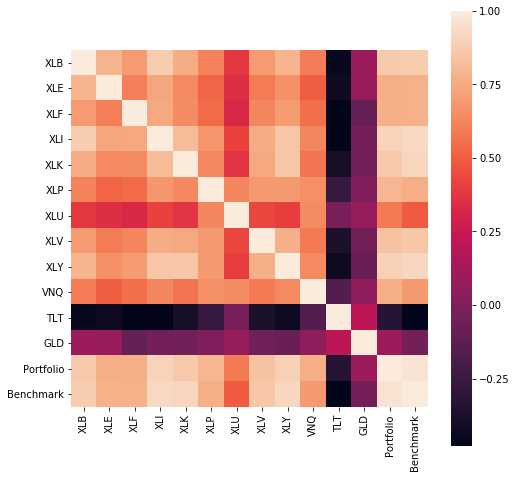

In [11]:
import seaborn as sns

# Using Heatmap to illustrate corrleation matrix 
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_pf, square=True, ax=ax)

## Performance KPI of portfolio for buy-and-hold strategy

In [12]:
def pf_perform_KPI(weight):
    """Get the performance KPI from the time series of percentage or logarithmic daily return."""
    df_normed_pf, df_pct_pf = pf_weight(weight)   # the normed price and percentage return dataframe
    cov_symbols, corr_symbols = pf_cov(weight)    # Covariance matrix for beta computation
    df_log_pf = np.log(df_pct_pf.add(1))          # Logarithmic Return
    
    df_kpi = pd.DataFrame(columns=df_log_pf.columns)
    row_label = pd.Series(['mean_return', 'sigma', 'sharpe_ratio', 'MDD', 'beta'])
    
    for asset in df_kpi.columns:
        mean_return = df_log_pf[asset].mean() * 252 - rf  # Mean annualized return minus risk-free rate
        sd_return = df_log_pf[asset].std() * np.sqrt(252) # Annualized volatility
        df_kpi[asset] = [mean_return, 
                         sd_return, 
                         mean_return / sd_return,   # Sharpe Ratio
                         (df_normed_pf[asset] / df_normed_pf[asset].cummax()).min() - 1, # Maximum Drawdown
                         cov_symbols.loc[asset, 'Benchmark'] / cov_symbols.loc['Benchmark', 'Benchmark']  
                         # beta = asset risk compared to unsystematic market risk
                        ]
    df_kpi.set_index(row_label, inplace=True)

    return df_kpi

In [13]:
df_kpi = pf_perform_KPI(eqweight)
df_kpi

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,VNQ,TLT,GLD,Portfolio,Benchmark
mean_return,0.049541,-0.004572,0.117239,0.093894,0.128991,0.087651,0.091650,0.122937,0.129984,0.072350,0.049241,-0.024179,0.085097,0.098814
sigma,0.186748,0.215749,0.212874,0.167940,0.168283,0.118157,0.139369,0.149994,0.158388,0.167721,0.134206,0.155382,0.113148,0.144303
sharpe_ratio,0.265283,-0.021189,0.550742,0.559095,0.766513,0.741822,0.657608,0.819612,0.820666,0.431375,0.366903,-0.155607,0.752092,0.684769
MDD,-0.294984,-0.467452,-0.336773,-0.258383,-0.237849,-0.161044,-0.156900,-0.173344,-0.213715,-0.226337,-0.206588,-0.455550,-0.158385,-0.193489
beta,1.133759,1.166390,1.184880,1.082362,1.067692,0.626012,0.471874,0.892496,1.013697,0.804163,-0.441371,-0.037642,0.760583,1.000000


From above KPI dataframe we could observe:

-  Health care, Consumer Discretionary, Technology ETFs has highest annualized return
-  Annualized volatility of each ETF typically lies in range 14-21% 
-  Equal-weighted portfolio has lower volatility than ANY individual ETF
-  Equal-weighted portfolio has lower maximum drawdown than ALL but consumer staple ETF
-  All equity sector ETF has positive beta, with utilities having lowest beta and financial sector highest
-  Equal-weighted portfolio has beta 0.76 < 1 thanks to allocation into bonds, gold and low-beta sector



## Portfolio Optimization

### Generate Random weight (from uniform distribution)

-  Presumably we don't know much about fundamentals of each sector
-  Use uniform distribution to generate weights 
-  Eliminate extreme concentration into individual sector

In [14]:
def get_random_weight(rand_size):
    """Generate random weights from uniform distribution and store them into a dataframe."""
    df_weight = pd.DataFrame(columns=sectorlist)
    for symbol in sectorlist:
        df_weight[symbol] = np.random.uniform(size=rand_size)
    df_weight = df_weight.div(df_weight.sum(axis=1), axis=0)

    return df_weight

In [15]:
def randweight_kpi(df_weight, normed_pf, normed_benchmark):
    """Compute KPI's such as mean return, sigma for each randomized portfilio."""
    # Create empty dataframe with the desired KPI as column names
    kpi_columns = ['mean%', 'sigma%', 'sharpe', 'beta']
    df_kpi = pd.DataFrame(columns=kpi_columns)
    benchmark_return = np.log(normed_benchmark.pct_change() + 1)

    # For loop to compute the KPI
    rand_size = df_weight.shape[0]
    for num in range(rand_size):
        weight = df_weight.iloc[num, :]
        df_portfolio = normed_pf.mul(weight, axis=1).sum(axis=1)
        log_return = np.log(df_portfolio.pct_change() + 1)

        log_mean = 100 * (log_return.mean() * 252 - rf)     # Annualized log return
        log_sd = 100 * log_return.std() * np.sqrt(252)           # Average daily SD
        sharpe = log_mean / log_sd                               # Sharpe Ratio

        # Calcuation of beta (ratio of covariance over benchmark's variance)
        cov_random = pd.concat([pd.DataFrame(log_return, columns=['portfolio']), benchmark_return], axis=1).cov()
        beta = cov_random.iloc[0, 1] / cov_random.iloc[1, 1]    # beta
        df_kpi = df_kpi.append({'mean%': log_mean, 'sigma%': log_sd, 'sharpe': sharpe, 'beta': beta}, 
                               ignore_index=True)

    df_kpi = pd.concat([df_weight, df_kpi], axis=1)    

    return df_kpi

## Simulate 2500 portfolios

In [16]:
# Start time count for simulations
from time import time
start_time = time()

rf = 0.02           # Risk-free rate
rand_size = 2500    # 2500 Simulations

df_weight = get_random_weight(rand_size)
df_kpi = randweight_kpi(df_weight, df_normed_sectors, df_normed_benchmark)

print('Mean Sharpe: ', df_kpi['sharpe'].mean())
print('Max Sharpe: ',  df_kpi['sharpe'].max())
print('Mean CAGR: ', df_kpi['mean%'].mean())
print('Max CAGR: ', df_kpi['mean%'].max())
print('Mean Sigma: ' , df_kpi['sigma%'].mean())
print('Min Sigma: ' , df_kpi['sigma%'].min())
print('Average beta: ', df_kpi['beta'].mean())

# Check time elapsed
print('\nTime elapsed: ', time() - start_time)

Mean Sharpe:  0.7426266855711583
Max Sharpe:  0.9981821356005987
Mean CAGR:  8.51014324344453
Max CAGR:  10.973936633232652
Mean Sigma:  11.513222048789766
Min Sigma:  8.288528909132003
Average beta:  0.7640804752668148

Time elapsed:  17.042036533355713


## Sorting with Sharpe ratios, mean return & volatility

In [17]:
# Portfolio with max sharpe
maxsharpe_row = df_kpi['sharpe'].idxmax()
maxsharpe_df = df_weight.iloc[[maxsharpe_row], :]

# Portfolio with max return
maxreturn_row = df_kpi['mean%'].idxmax()
maxreturn_df = df_weight.iloc[[maxreturn_row], :]

# Portfolio with min volatility
minvol_row = df_kpi['sigma%'].idxmin()
minvol_df = df_weight.iloc[[minvol_row], :]

# Joining the three objectives
df_optpf = pd.concat([maxsharpe_df, maxreturn_df, minvol_df], axis=0)
df_optpf.index = ['max_sharpe', 'max_return', 'min_vol']
df_optpf

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,VNQ,TLT,GLD
max_sharpe,0.013332,0.001506,0.075878,0.063048,0.188253,0.056759,0.071336,0.106183,0.117224,0.000917,0.196178,0.109388
max_return,0.020248,0.042844,0.197735,0.112968,0.191318,0.017221,0.094091,0.151607,0.109240,0.050371,0.007154,0.005202
min_vol,0.025511,0.088746,0.006315,0.044603,0.090968,0.038715,0.135563,0.124340,0.013060,0.012191,0.206092,0.213895


### Average weights of top 25 Sharpe-ratio portfolios (with pie chart)

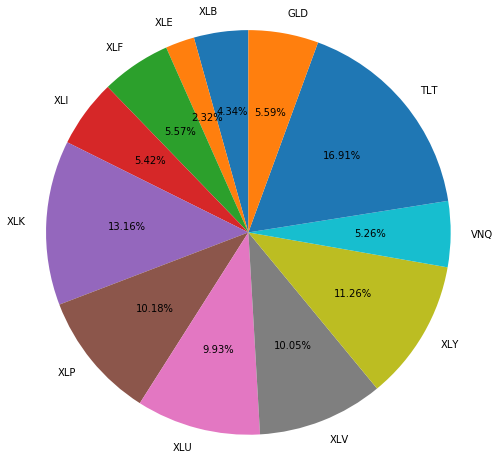

In [18]:
# Sort the portfolios by Sharpe ratio (descending order)
df_sort_sharpe = df_kpi.sort_values(['sharpe', 'mean%'], ascending=False)
df_sort_sharpe.reset_index(inplace=True)
df_sort_sharpe.drop('index', axis=1, inplace=True)

# Average weights & Sharpe ratio of the top 1% portfolios
top_sharpe = pd.DataFrame(df_sort_sharpe.head(rand_size//100).mean()).transpose()

# Piechart labels by the ETF symbol list
labels = sectorlist
pct = top_sharpe.loc[0, sectorlist]

# Constructing Pie Chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [19]:
# Average KPI for the top 25 Sharpe-ratio Portfolios

top_sharpe.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta']]

,mean%,sigma%,sharpe,beta
0,9.322135,9.982831,0.93432,0.642399


- Top 25 Sharpe Porfolio on average puts heaviest weights on the following 3 sectors:
    - Treasury Bonds (TLT)
    - Technology (XLK)
    - Consumer Discretionary (XLY)
    
- After re-run of several batch of 2500 portfolios, TLT are steady heaviest while XLY/XLV/XLK/XLP could be the next two heaviest

### Average weights of top 25 Return portfolios

-  Expect heavier weights of best-growth sectors such as health care and technologies

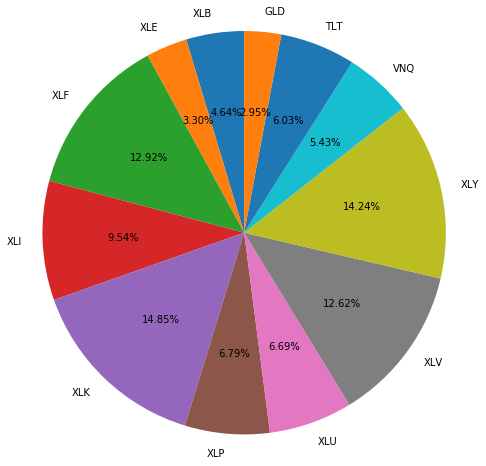

In [20]:
# Average weights & Sharpe ratio of the top 25 return portfolios
df_sort_return = df_kpi.sort_values(['mean%', 'sharpe'], ascending=False)
df_sort_return.reset_index(inplace=True)
df_sort_return.drop('index', axis=1, inplace=True)

top_return = pd.DataFrame(df_sort_return.head(rand_size//100).mean()).transpose()
pct = top_return.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()

In [21]:
# Average KPI for the top 25 return Portfolios

top_return.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta']]

,mean%,sigma%,sharpe,beta
0,10.307801,12.681954,0.816974,0.861056


- Top 25 Return Porfolio on average puts heaviest weights on following sectors:
    - Technology (XLK)
    - Consumer Discretionary (XLY)
    - Finance (XLF)

- After re-run of several batch of 2500 portfolios, a couple different trios among XLY/XLV/XLK/XLP/XLF could appear as top 3

### Average weights of top 25 low-volatility portfolios

-  Expect heavier weights of risk-off assets like TLT, GLD

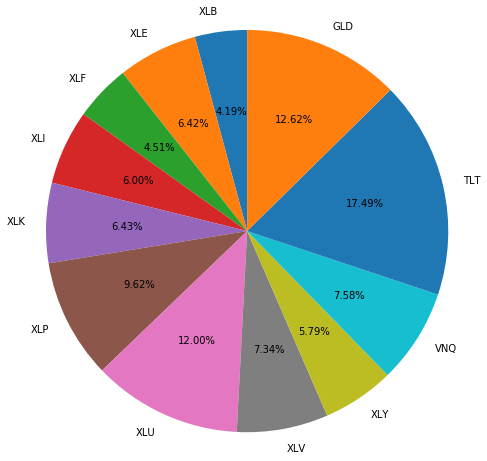

In [22]:
# Average weights & Sharpe ratio of the bottom 1% volatility portfolios

df_sort_sigma = df_kpi.sort_values(['sigma%'], ascending=True)
df_sort_sigma.reset_index(inplace=True)
df_sort_sigma.drop('index', axis=1, inplace=True)

min_vol = pd.DataFrame(df_sort_sigma.head(rand_size//100).mean()).transpose()
pct = min_vol.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()

In [23]:
# Average KPI for the top 25 low-vol Portfolios

min_vol.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta']]

,mean%,sigma%,sharpe,beta
0,7.714502,9.14212,0.843419,0.552071


- Top 25 low-vol Porfolio on average puts heaviest weights on following sectors:
    - Treasuries
    - Gold
    - Utilities
    
- After re-run of several batch of 2500 portfolios, the above 3 ETFs are always the heaviest in portfolio
- Allocation is more robust than max-Sharpe or max-return considerations

### Scatter Plot & Optimal Portfolios

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


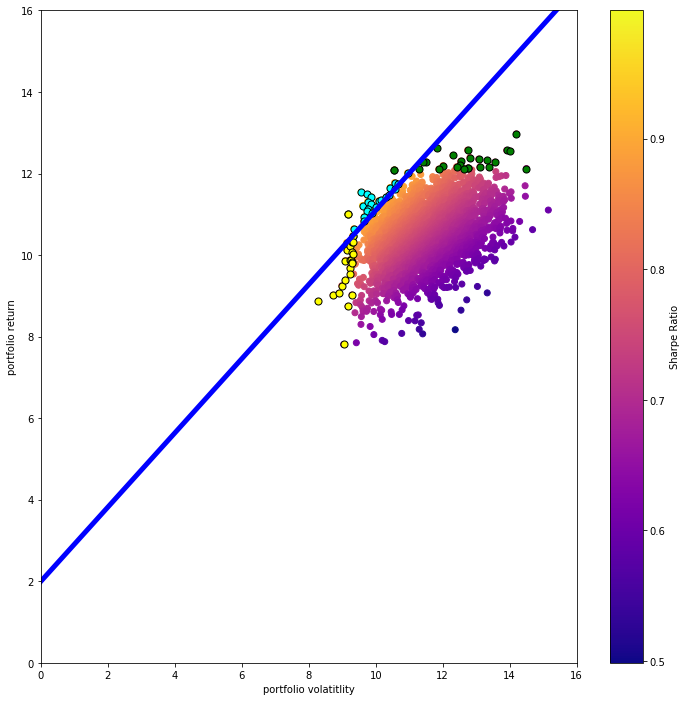

In [24]:
# Scatter plot of all (sigma, return)-tuple of the 10000 portfolios 
plt.figure(figsize=(12,12))
fig = plt.scatter(df_sort_sharpe['sigma%'], df_sort_sharpe['mean%'] + 100 * rf, c=df_sort_sharpe['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add cyan dots for top 25 Sharpe ratio
top1 = plt.scatter(df_sort_sharpe.head(rand_size//100)['sigma%'], df_sort_sharpe.head(rand_size//100)['mean%'] + 100 * rf, c='cyan', s=50, edgecolors='black')

# Add green dots for top 25 Return
top2 = plt.scatter(df_sort_return.head(rand_size//100)['sigma%'], df_sort_return.head(rand_size//100)['mean%'] + 100 * rf, c='green', s=50, edgecolors='black')

# Add yellow dots for top 25 low-vol
top3 = plt.scatter(df_sort_sigma.head(rand_size//100)['sigma%'], df_sort_sigma.head(rand_size//100)['mean%'] + 100 * rf, c='yellow', s=50, edgecolors='black')

# Add straight line of optimal portfolios
xline = np.linspace(0, 16.0, 500)
yline = df_sort_sharpe['sharpe'][rand_size//100] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=5)

# Set annualized return range from 0 to 16%
plt.ylim(ymin=0)
plt.ylim(ymax=16)

# Set sigma range from 0 to 16%
plt.xlim(xmin=0)
plt.xlim(xmax=16)
plt.show()

- However the above diagram is NOT a reasonable modelling of forward testing
- Train-test-split is necessary

## Train-test-split on asset weights

- Split the dataset into two equal halves
- Find the top 1% sharpe-ratio portfolios on training set (2011-2014)
- Verify the respective (sigma, return)-tuple on test set (2015-2018)

In [25]:
startdate = '2011-01-03'
enddate = '2019-06-30'

def train_test_split(train_end):
    """Split the dataset into training set and test set, with normed prices in each of two datasets."""

    # Split the normed_pf and normed_index dataframes into two halves
    train_pf = df_normed_sectors.loc[startdate:train_end]
    train_benchmark = df_normed_benchmark.loc[startdate:train_end]
    test_pf = df_normed_pf.loc[train_end:enddate]
    test_benchmark = df_normed_benchmark.loc[train_end:enddate]

    # Normalize the test datasets
    test_pf = test_pf / test_pf.iloc[0, :]
    test_benchmark = test_benchmark / test_benchmark.iloc[0, :]      

    # KPI dataframes for training datasets & test datasets
    train_kpi = randweight_kpi(df_weight, train_pf, train_benchmark)
    test_kpi = randweight_kpi(df_weight, test_pf, test_benchmark)

    return train_kpi, test_kpi

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


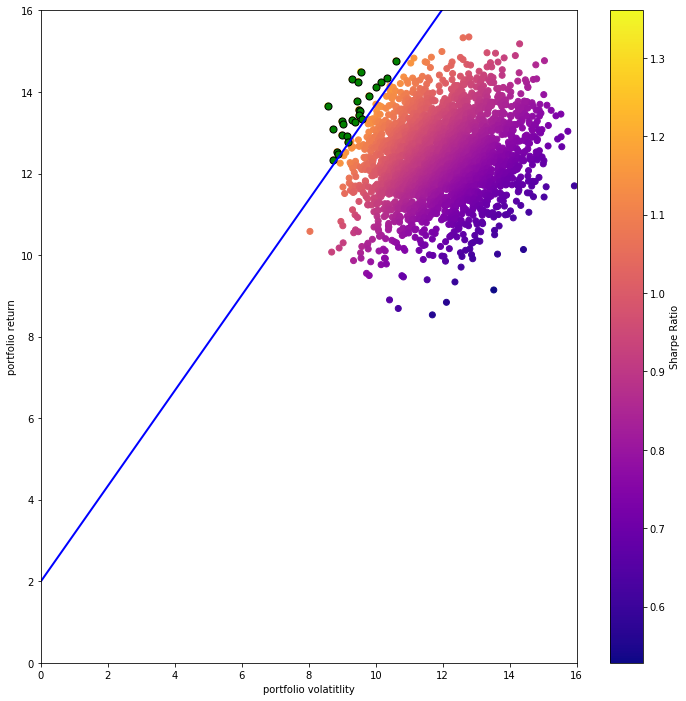

In [26]:
# Split the dataset by the timestamp 2014-12-31
# train_KPI:  2011-2014
# test_KPI:   2015-2019
train_kpi, test_kpi = train_test_split('2014-12-31')

# Sort with descending Sharpe ratio and scatter plots 
train_sort_sharpe = train_kpi.sort_values(['sharpe', 'mean%'], ascending=False)
train_sort_sharpe.reset_index(inplace=True)

plt.figure(figsize=(12,12))
fig = plt.scatter(train_sort_sharpe['sigma%'], train_sort_sharpe['mean%'] + 100 * rf, c=train_sort_sharpe['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add green dots for top 1% Sharpe ratio
top = plt.scatter(train_sort_sharpe.head(rand_size//100)['sigma%'], train_sort_sharpe.head(rand_size//100)['mean%'] + 100 * rf, c='green', s=50, edgecolors='black')

# Add straight line of optimal portfolio
xline = np.linspace(0, 16.0, 500)
yline = train_sort_sharpe['sharpe'][rand_size//100] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=2)

# Set annualized return range from 0 to 16%
plt.ylim(ymin=0)
plt.ylim(ymax=16)

# Set sigma range from 0 to 16%
plt.xlim(xmin=0)
plt.xlim(xmax=16)
plt.show()


D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


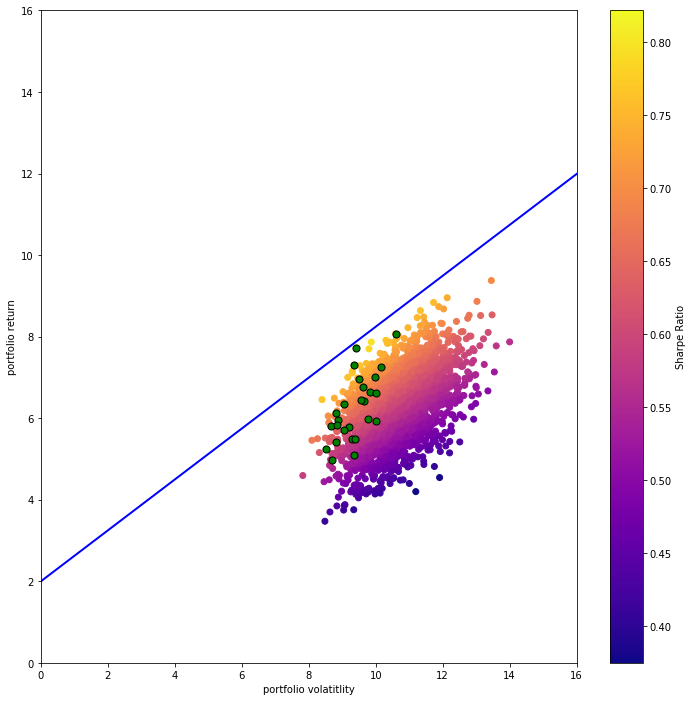

In [31]:
# Apply the top 1% sharpe in training set to test set 

top_index = train_sort_sharpe.loc[0:rand_size//100, 'index']

plt.figure(figsize=(12,12))
fig = plt.scatter(test_kpi['sigma%'], test_kpi['mean%'], c=test_kpi['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add red dots for top 1% Sharpe ratio
top = plt.scatter(test_kpi.loc[top_index, 'sigma%'], test_kpi.loc[top_index, 'mean%'], c='green', s=50, edgecolors='black')

# Add straight line of optimal portfolio
xline = np.linspace(0, 16.0, 500)
yline = test_kpi.loc[0,'sharpe'] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=2)

# Set annualized return range from 0 to 16%
plt.ylim(ymin=0)
plt.ylim(ymax=16)

# Set sigma range from 0 to 16%
plt.xlim(xmin=0)
plt.xlim(xmax=16)
plt.show()

### KPI for training set and test set

- Expect top 25 Sharpe in training set performs worse in test set
- Expect lower Sharpe in test set versus training set due to 2015 & 2018 huge correction 

In [28]:
# KPI for training set

top_train = pd.DataFrame(train_sort_sharpe.head(rand_size//100).mean()).transpose()
top_train.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta']]

,mean%,sigma%,sharpe,beta
0,11.515102,9.380868,1.228188,0.556499


In [29]:
# Mean Performance in test set

top_apply_test = pd.DataFrame(test_kpi.loc[top_index].mean()).transpose()
top_apply_test.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta']]

,mean%,sigma%,sharpe,beta
0,6.244618,9.383081,0.66443,0.622438


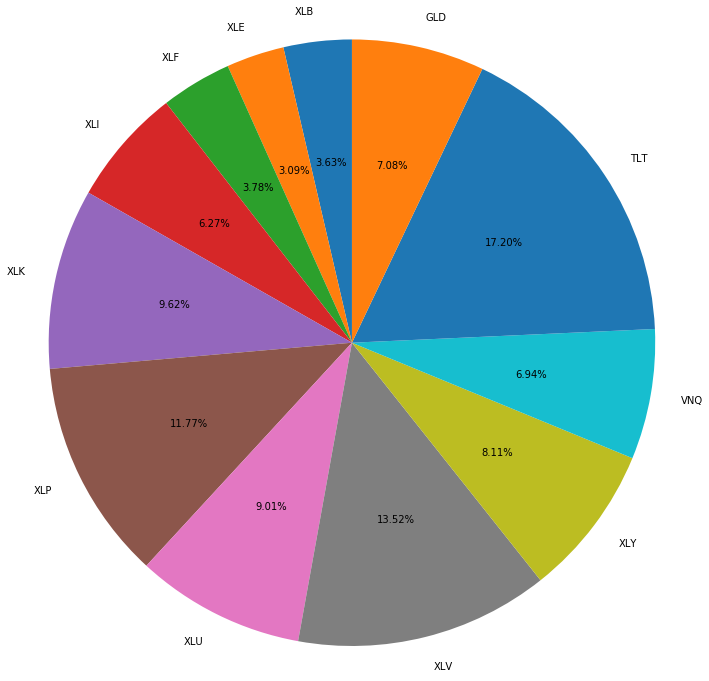

In [30]:
# Mean allocation for top 1% sharpe in training set

top_train = pd.DataFrame(train_sort_sharpe.head(rand_size//100).mean()).transpose()
top_train_allocate = top_train.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(12,12))
ax.pie(top_train_allocate, labels=sectorlist, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()


-  Top 1% Sharpe ratio has average weights heavist in:
    -  Treasury (TLT)
    -  Health Care (XLV)
    -  Consumer Staples (XLP)
    -  Technology (XLK)
    -  Utilities (XLU)
    
-  Not much different from observation without train-test-split